# Introduction
This code tests our work on Breast Cancer Wisconsin (Diagnostic) Data Set (WDBCD) (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#import os
#print(os.listdir("../input"))
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

%matplotlib inline 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils



#Import models from scikit learn module:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

#Measuring Time
import time


# Parameters

In [2]:
epoch=50

# Loading Dataset

In [3]:
#load dataset
data = pd.read_csv("/kaggle/input/wdbc-kd-data/data.csv",header = 0)
print(type(data))
data.head(5)

<class 'pandas.core.frame.DataFrame'>


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Preprocessing
## Get classes

In [4]:
Y=data.diagnosis

print(Y.value_counts())
Y.head(5)

diagnosis
B    357
M    212
Name: count, dtype: int64


0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

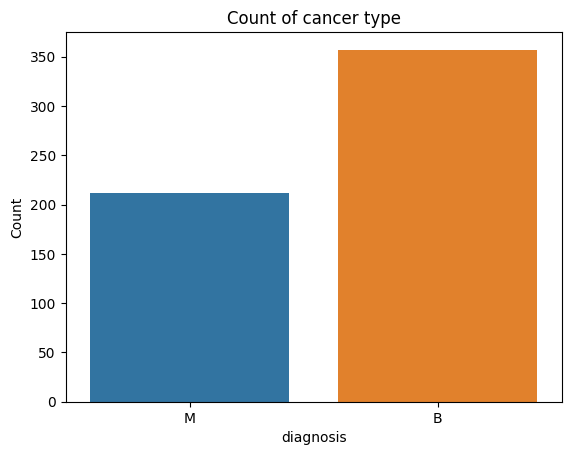

In [5]:
plt.title('Count of cancer type')
sns.countplot(x="diagnosis",data=data)
plt.ylabel('Count')
plt.show()

## Prepare and clean the dataset

In [6]:
data.isnull().any().describe()

count        33
unique        2
top       False
freq         32
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Remove unwanted info

In [8]:
# drop id and unnamed 32 colums from the features
# we still need diagnosis for further statistics, 
# it will be dropped later

data.drop(['id','Unnamed: 32'],axis=1,inplace=True)
data.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

(None,)

In [9]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Analyse usable data

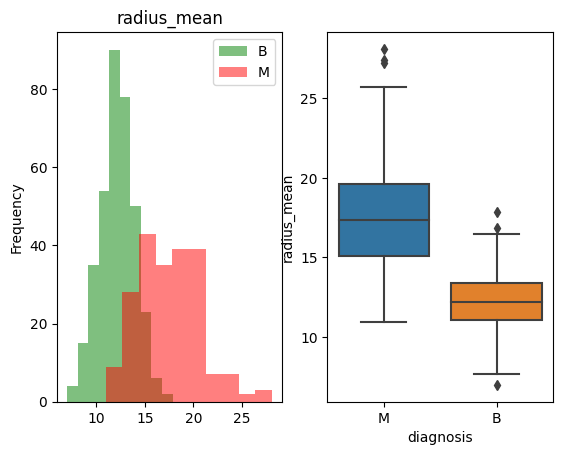

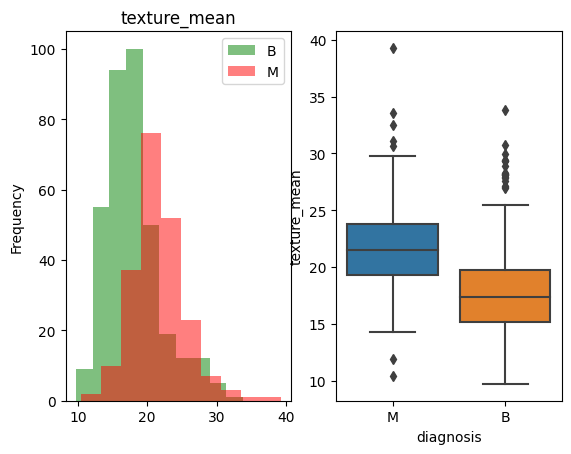

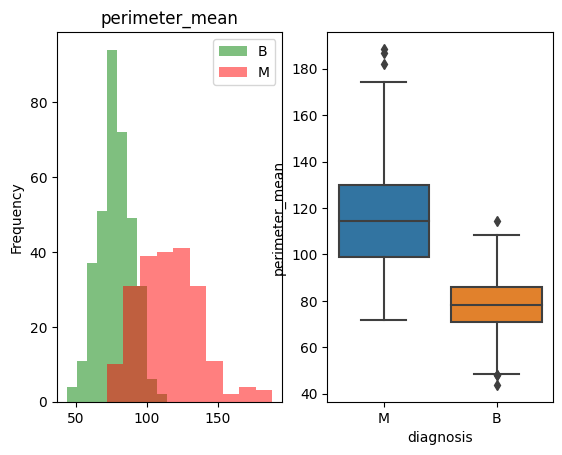

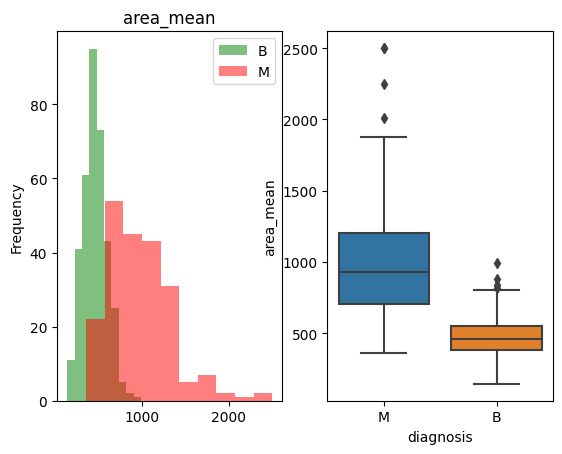

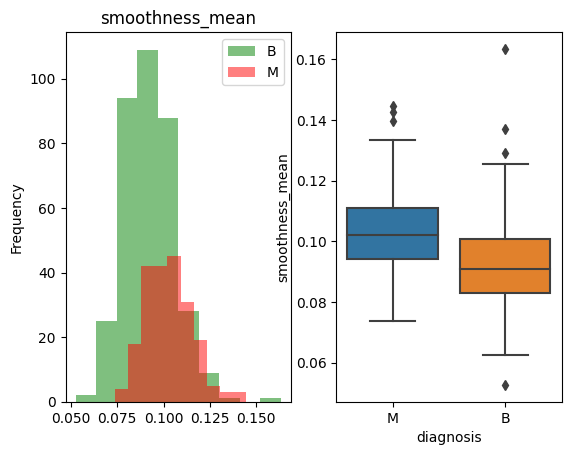

In [10]:
for i in (data.columns[1:6]):
    plt.subplot(1,2,1)
    data[i][data['diagnosis']=='B'].plot.hist(alpha=0.5,title=i,color='green')
    data[i][data['diagnosis']=='M'].plot.hist(alpha=0.5,color='red')
    plt.legend(['B','M'],loc='upper right')
    #plt.grid(visible=True)
    
    
    plt.subplot(1,2,2)
    sns.boxplot(x="diagnosis", y=i, data=data)
    plt.show()

## Observations*
1. Mean values of cell like radius, perimeter, area, compactness, concavity,concave points etc can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
2. Mean values of column like texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Remove input from data

In [11]:
#Diagnosis is in index 0, 
#so we start copying from index 1
#see, I told you we will drop it ;-)

data.drop('diagnosis',axis=1,inplace=True)
data.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Correlation matrix

In [12]:
# Create correlation matrix
data.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Text(0.5, 1.0, 'Correlation between different fearures')

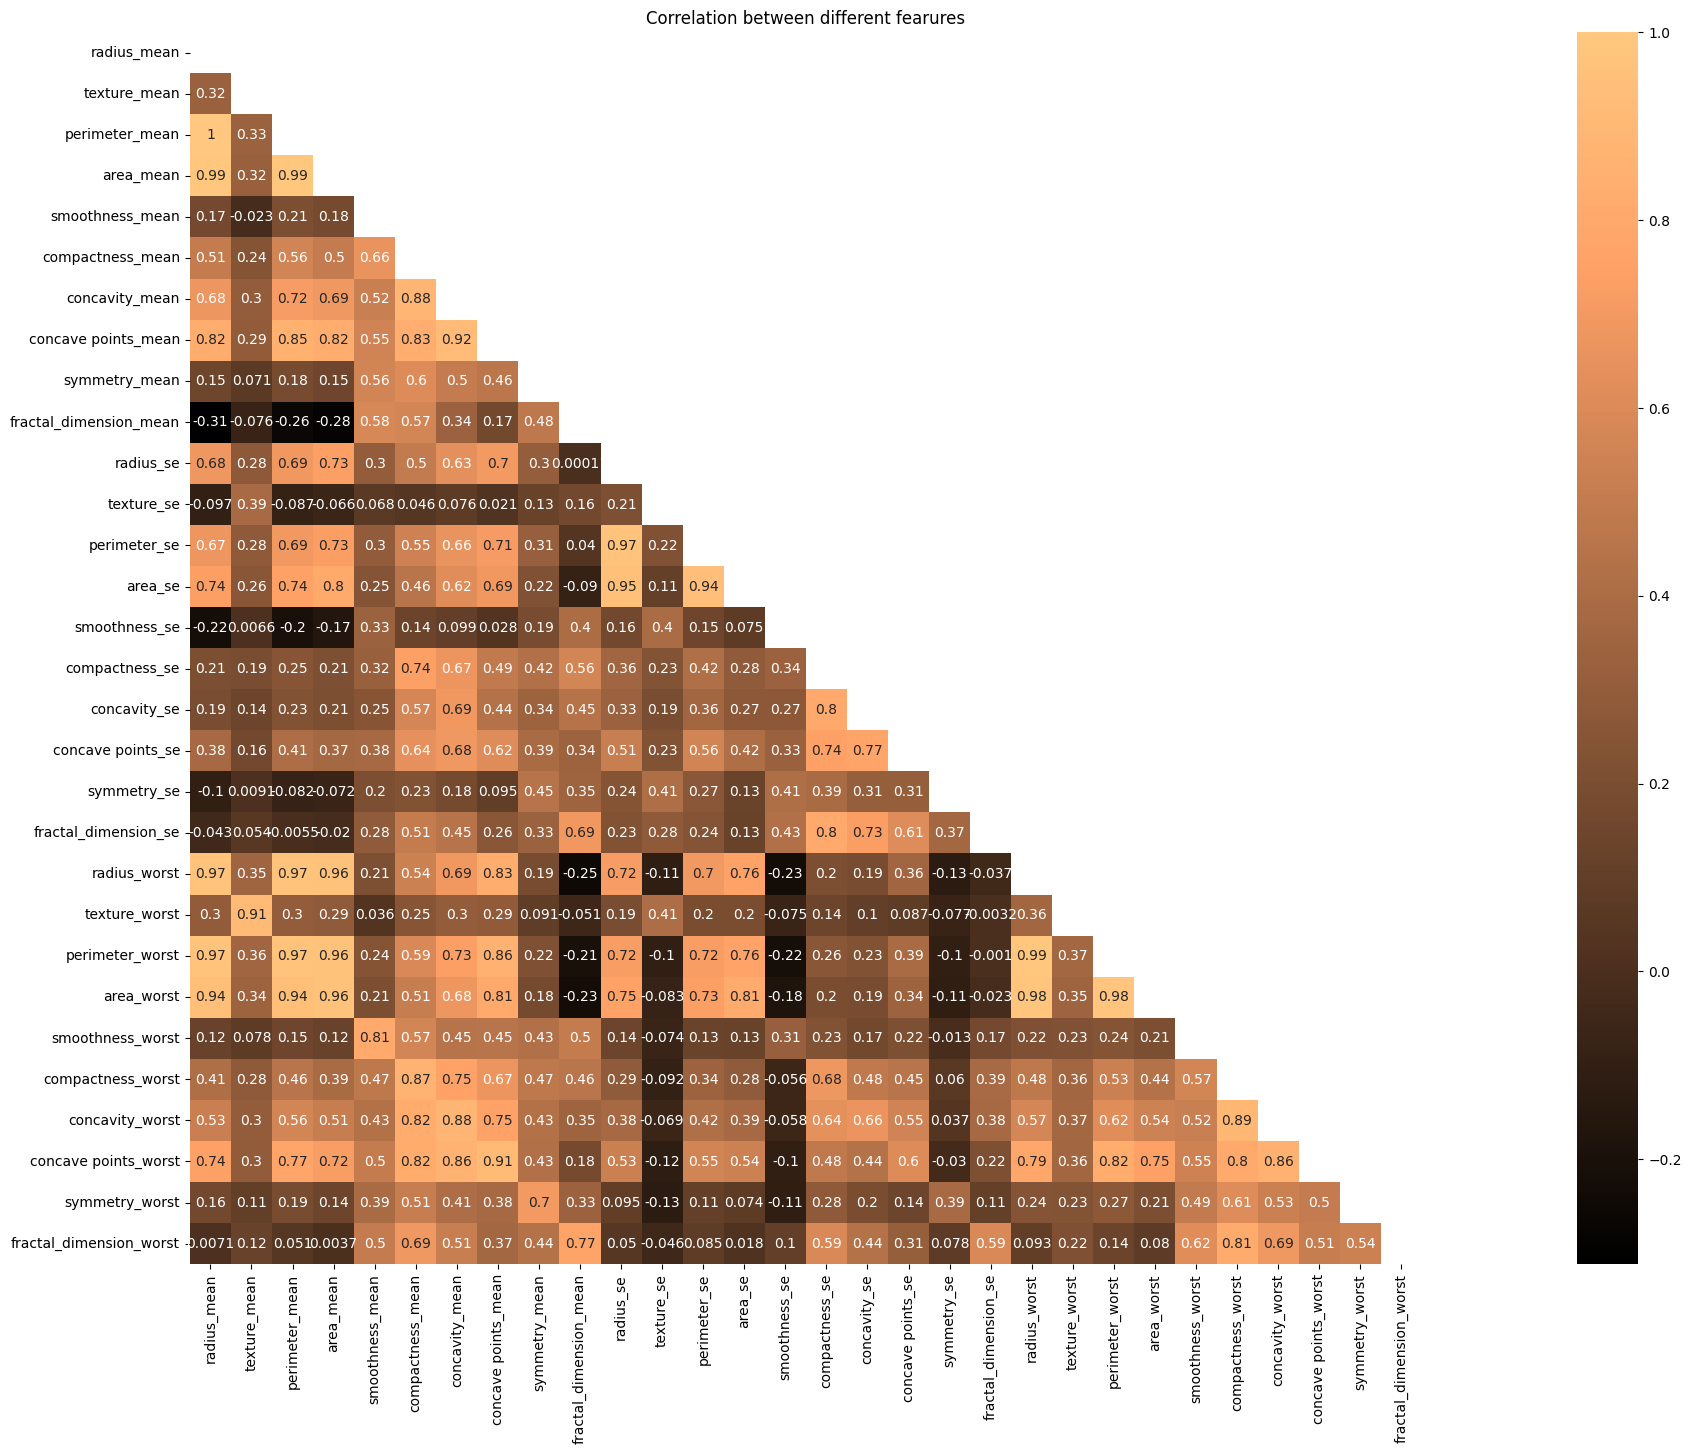

In [13]:
correlation=data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(correlation)
plt.figure(figsize=(40,16))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='copper',mask=matrix)
plt.title('Correlation between different fearures')
#plt.savefig("cor.svg")

In [14]:
type(data)

pandas.core.frame.DataFrame

## Get the input (X)

In [15]:
#Copying data to X for bravity
X=data

#for emulating user
temp=pd.DataFrame(data=[data.values.tolist()[0]],columns=data.columns.values.tolist())
del data

#Verify :-D
print(type(X))
X.head(5)

<class 'pandas.core.frame.DataFrame'>


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA

In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.29334919e-03,  1.98910417e-03,  7.04378359e-04],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -1.34685217e-03,  6.85925212e-04, -1.06125086e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.84867758e-05, -7.75218581e-04,  4.05360270e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
         2.54369638e-05,  4.83858890e-04, -2.85342703e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.23547951e-03, -8.08728730e-04,  1.21655195e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
        -4.44552928e-03,  2.42876427e-04,  1.46800350e-03]])

In [17]:
pca.get_covariance()

array([[ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,
         1.22448341e+03,  8.45445983e-03,  9.41970568e-02,
         1.90127582e-01,  1.12475116e-01,  1.42731729e-02,
        -7.75370629e-03,  6.63650325e-01, -1.89188600e-01,
         4.80354973e+00,  1.17968162e+02, -2.35533633e-03,
         1.30005142e-02,  2.06588280e-02,  8.17956306e-03,
        -3.03898170e-03, -3.97624858e-04,  1.65137495e+01,
         6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
         9.62462515e-03,  2.29249204e-01,  3.87386440e-01,
         1.72392739e-01,  3.57457580e-02,  4.49735060e-04],
       [ 4.90758156e+00,  1.84989087e+01,  3.44397592e+01,
         4.85993787e+02, -1.41477877e-03,  5.37668058e-02,
         1.03692344e-01,  4.89769268e-02,  8.41887566e-03,
        -2.32115824e-03,  3.29037393e-01,  9.16695072e-01,
         2.44944877e+00,  5.08408652e+01,  8.54099045e-05,
         1.47865987e-02,  1.86039300e-02,  4.34837964e-03,
         3.24506954e-04,  6.19772637e-04,  7.32926700e+

In [18]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

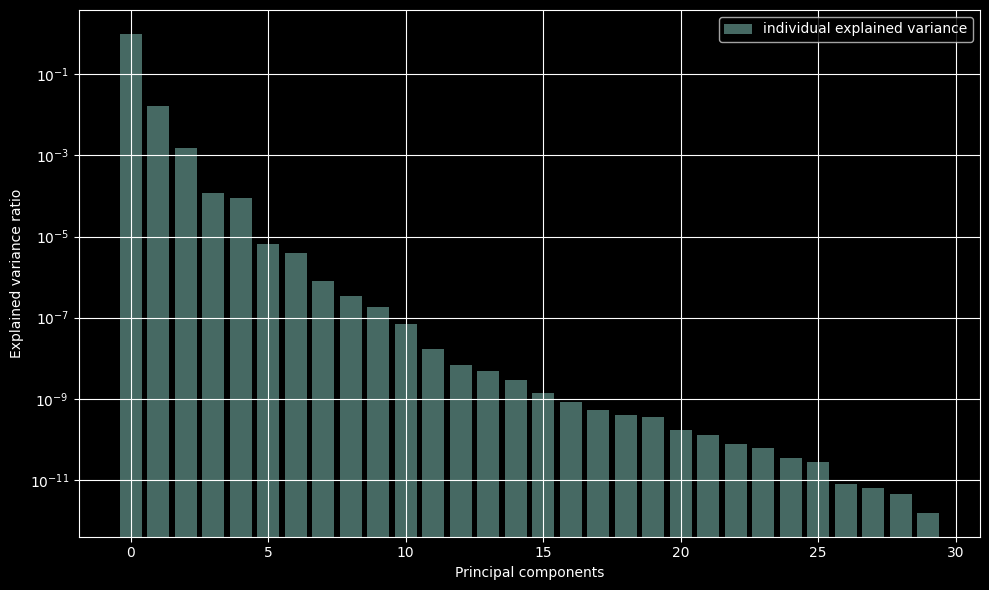

In [19]:
# We used logarithmic scale in the y-axis becaus the first value is so high

with plt.style.context('dark_background'):
    fig=plt.figure(figsize=(10, 6))
    ax = fig.add_subplot()

    ax.bar(range(30), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    ax.set_yscale('log')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.grid(visible=True)
    plt.tight_layout()

Thus we can see from the above plot that first three components constitute almost 73% of the variance. Fourth to twenty sixth components has 25% of the data sprad.The remaining component has less than 0.001% of the variance.Hence we can drop from 27 to 30th component(total of 4 features)



In [20]:
pca=PCA(n_components=26)
X_new=pca.fit_transform(X)
X_new

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
         1.15600264e-02,  5.77287322e-03,  1.37696164e-03],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
         6.96754281e-03, -6.97814727e-03,  1.41102647e-03],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
        -4.00723197e-03,  7.09320402e-04, -3.78086998e-03],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
        -3.92718961e-03, -9.20501512e-04,  5.73214324e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         1.12694062e-03, -2.64574418e-03,  1.86150989e-03],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
         1.15292833e-02,  1.27452776e-02,  3.53933403e-03]])

In [21]:
pca.get_covariance()

array([[ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,
         1.22448341e+03,  8.45445990e-03,  9.41970568e-02,
         1.90127582e-01,  1.12475116e-01,  1.42731729e-02,
        -7.75370607e-03,  6.63650325e-01, -1.89188600e-01,
         4.80354973e+00,  1.17968162e+02, -2.35533492e-03,
         1.30005136e-02,  2.06588275e-02,  8.17956694e-03,
        -3.03898194e-03, -3.97623863e-04,  1.65137495e+01,
         6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
         9.62462491e-03,  2.29249204e-01,  3.87386440e-01,
         1.72392738e-01,  3.57457581e-02,  4.49734957e-04],
       [ 4.90758156e+00,  1.84989087e+01,  3.44397592e+01,
         4.85993787e+02, -1.41477877e-03,  5.37668058e-02,
         1.03692344e-01,  4.89769268e-02,  8.41887565e-03,
        -2.32115828e-03,  3.29037393e-01,  9.16695072e-01,
         2.44944877e+00,  5.08408652e+01,  8.54099700e-05,
         1.47865986e-02,  1.86039300e-02,  4.34837991e-03,
         3.24506944e-04,  6.19772640e-04,  7.32926700e+

In [22]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11])

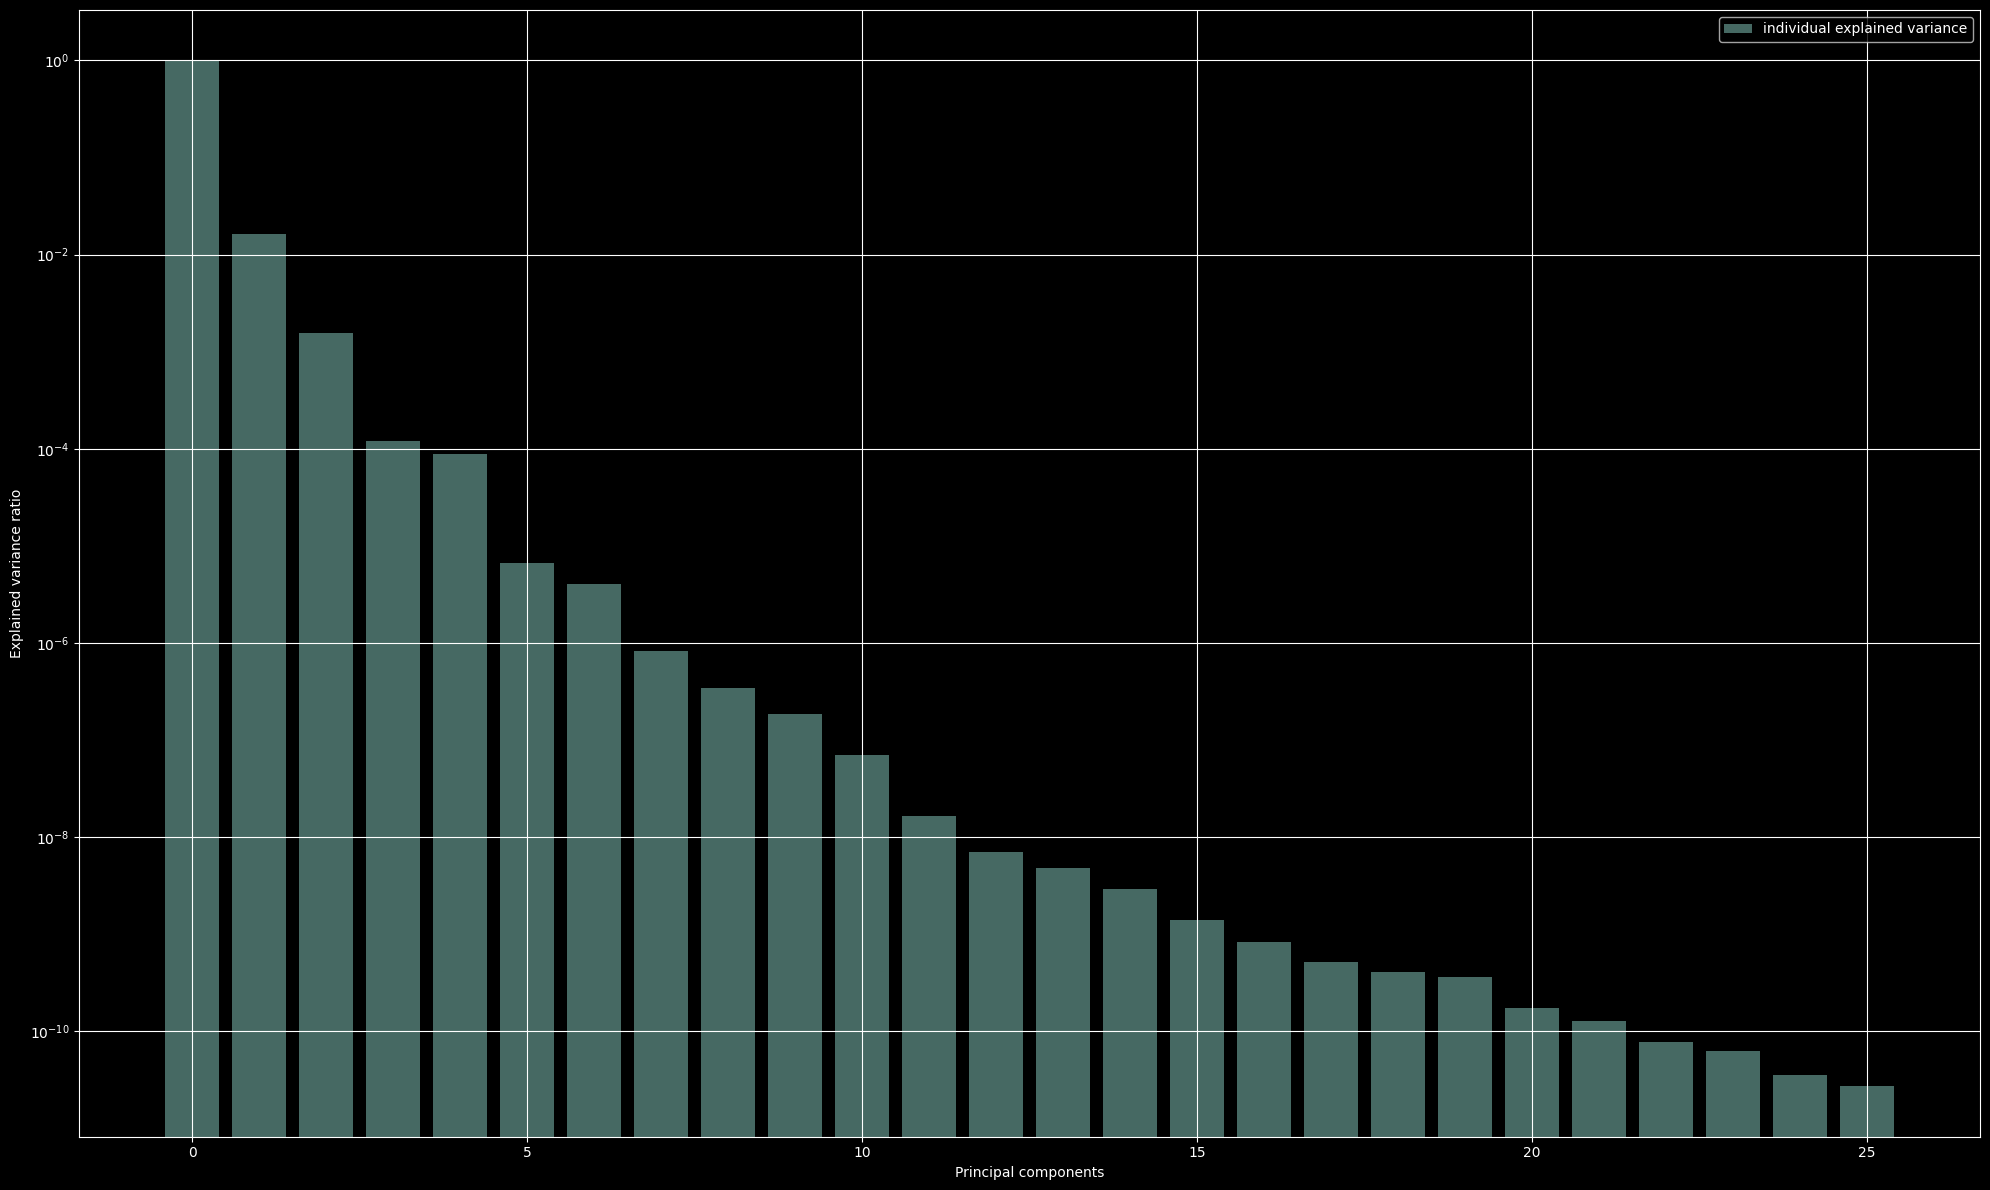

In [23]:
# We used logarithmic scale in the y-axis becaus the first value is so high

with plt.style.context('dark_background'):
    fig=plt.figure(figsize=(20, 12))
    ax = fig.add_subplot()

    ax.bar(range(26), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    ax.set_yscale('log')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.grid(visible=True)
    plt.tight_layout()

In [24]:
X=X_new
(X.shape, Y.shape)

((569, 26), (569,))

## Convert to one-hot

In [25]:
#Check befor conversion
print("Converting to categorical")
print("Before Conversion:")
print(Y.shape)
print(type(Y))


#Convert to Categorical values
Y = Y.map({'B':0,'M':1})
Y = utils.to_categorical(Y, num_classes=2)


#verify shape
print("After Conversion:")
print(Y.shape)
type(Y)

Converting to categorical
Before Conversion:
(569,)
<class 'pandas.core.series.Series'>
After Conversion:
(569, 2)


numpy.ndarray

## Splitting data into training and testing

In [26]:
(X.shape, Y.shape)

((569, 26), (569, 2))

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.15,stratify=Y)

In [28]:
y_test.shape

(86, 2)

## Scaling

In [29]:
scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(X_train.shape, X_test)

((483, 26),
 array([[-0.49426546,  0.45462177, -0.25524821, ..., -0.87473483,
         -0.19458334,  0.48920062],
        [-0.770764  , -0.01278075,  0.43172873, ...,  0.52360464,
          0.97702854, -1.5214965 ],
        [-0.58924153, -0.10604357,  0.12703076, ..., -0.81037567,
         -0.24470954, -1.10164156],
        ...,
        [-0.73019167, -0.19844136,  0.10015009, ..., -0.72543342,
         -0.15913721, -0.90160885],
        [-0.74032777, -0.37330416,  0.50205935, ..., -0.3611687 ,
         -0.70778417, -0.40282074],
        [-1.11365311, -0.67405312,  0.38133365, ...,  0.2846888 ,
          0.46095722, -0.67686351]]))

## Reshaping

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((483, 26), (86, 26), (483, 2), (86, 2))

In [31]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [32]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((483, 26, 1), (86, 26, 1), (483, 2), (86, 2))

In [33]:
X_train.shape[1]

26

# Create teacher and student model

In [34]:
# Create the teacher
teacher =keras.Sequential()
teacher.add(keras.Input(shape=(X_train.shape[1],1)))
teacher.add(keras.layers.Conv1D(filters=64,kernel_size= 2,activation='relu'))
teacher.add(keras.layers.BatchNormalization())
teacher.add(keras.layers.Dropout(0.2))
        
teacher.add(keras.layers.Conv1D(448, 2,activation='relu'))
teacher.add(keras.layers.BatchNormalization())
teacher.add(keras.layers.Dropout(0.2))
        
teacher.add(keras.layers.Flatten())
teacher.add(keras.layers.Dense(64,activation='relu'))
teacher.add(keras.layers.Dropout(0.2))

teacher.add(keras.layers.Dense(2,activation='sigmoid'))

teacher.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',
              metrics=['accuracy'])


# Create the student
student = keras.Sequential(
    [
        keras.Input(shape=(X_train.shape[1], 1)),
        layers.Conv1D(4, 2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
       # layers.LeakyReLU(alpha=0.2),
        
        layers.Conv1D(8, 2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Flatten(),
        layers.Dense(2,activation='sigmoid'),
    ],
    name="student",)
    

# Clone student for later comparison
student_scratch = keras.models.clone_model(student)

#compile STUDENT
student_scratch.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',
              metrics=['accuracy'])

print( sep='\n')
print('STUDENT')


STUDENT


In [35]:
teacher.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 25, 64)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 25, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 24, 448)        │        57,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 448)        │         1,792 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 448)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10752)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       688,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 748,354 (2.85 MB)

 Trainable params: 747,330 (2.85 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [36]:
student.summary()

Model: "student"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 25, 4)          │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 4)          │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 24, 8)          │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 518 (2.02 KB)

 Trainable params: 494 (1.93 KB)

 Non-trainable params: 24 (96.00 B)

## Teacher Model training

In [37]:
start_time = time.time()
teacher_history=teacher.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),verbose=1)
end_time = time.time()
print( sep='\n')

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7052 - loss: 0.7143 - val_accuracy: 0.7674 - val_loss: 0.6639
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8685 - loss: 0.3663 - val_accuracy: 0.8953 - val_loss: 0.6293
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9413 - loss: 0.2066 - val_accuracy: 0.8605 - val_loss: 0.5927
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9552 - loss: 0.1726 - val_accuracy: 0.8256 - val_loss: 0.5555
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9640 - loss: 0.1415 - val_accuracy: 0.8140 - val_loss: 0.5261
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9690 - loss: 0.1329 - val_accuracy: 0.8256 - val_loss: 0.4985
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9815 - loss: 0.1011 - val_accuracy: 0.8372 - val_loss: 0.4698
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9889 - loss: 0.0894 - val_accuracy: 0.8721 - v

## Student Model without KD Training

In [38]:
start_time = time.time()
student_scratch_history=student_scratch.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),verbose=1)
end_time = time.time()
print( sep='\n')

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4395 - loss: 0.9540 - val_accuracy: 0.4767 - val_loss: 0.7894
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4721 - loss: 0.9225 - val_accuracy: 0.4767 - val_loss: 0.7839
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4727 - loss: 0.8962 - val_accuracy: 0.5000 - val_loss: 0.7808
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4789 - loss: 0.8998 - val_accuracy: 0.5116 - val_loss: 0.7769
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4510 - loss: 0.9242 - val_accuracy: 0.5116 - val_loss: 0.7722
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4803 - loss: 0.9025 - val_accuracy: 0.5465 - val_loss: 0.7688
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5414 - loss: 0.8352 - val_accuracy: 0.5465 - val_loss: 0.7647
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5376 - loss: 0.8527 - val_accuracy: 0.5814 - val_loss

# Knowledge Distillation
## Construct distiller class

In [39]:
class Distiller(keras.Model):
    def __init__(self, student, teacher):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(
        self,
        optimizer,
        metrics,
        student_loss_fn,
        distillation_loss_fn,
        alpha=0.1,
        temperature=3,
    ):
        """ Configure the distiller.

        Args:
            optimizer: Keras optimizer for the student weights
            metrics: Keras metrics for evaluation
            student_loss_fn: Loss function of difference between student
                predictions and ground-truth
            distillation_loss_fn: Loss function of difference between soft
                student predictions and soft teacher predictions
            alpha: weight to student_loss_fn and 1-alpha to distillation_loss_fn
            temperature: Temperature for softening probability distributions.
                Larger temperature gives softer distributions.
        """
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = student_loss_fn
        self.distillation_loss_fn = distillation_loss_fn
        self.alpha = alpha
        self.temperature = temperature

    def train_step(self, data):
        # Unpack data
        x, y = data

        # Forward pass of teacher
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            # Forward pass of student
            student_predictions = self.student(x, training=True)

            # Compute losses
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1),
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        # Compute gradients
        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Update the metrics configured in `compile()`.
        self.compiled_metrics.update_state(y, student_predictions)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update(
            {"student_loss": student_loss, "distillation_loss": distillation_loss}
        )
        return results

    def test_step(self, data):
        # Unpack the data
        x, y = data

        # Compute predictions
        y_prediction = self.student(x, training=False)

        # Calculate the loss
        student_loss = self.student_loss_fn(y, y_prediction)

        # Update the metrics.
        self.compiled_metrics.update_state(y, y_prediction)

        # Return a dict of performance
        results = {m.name: m.result() for m in self.metrics}
        results.update({"student_loss": student_loss})
        return results

In [40]:
# Define ranges for alpha and temperature
alpha_values = [0.1, 0.3, 0.5]
temperature_values = [2, 3, 5, 7, 10]

results = []

for alpha in alpha_values:
    for T in temperature_values:
        print(f"\nTraining with alpha={alpha}, temperature={T}...")

        # Reinitialize student model to ensure fair comparison
        student_copy = keras.models.clone_model(student)
        student_copy.build(input_shape=(None, X_train.shape[1], 1))

        # Create a fresh distiller for each run
        distiller = Distiller(student=student_copy, teacher=teacher)

        distiller.compile(
            optimizer=keras.optimizers.Adam(),
            metrics=['accuracy'],
            student_loss_fn=keras.losses.BinaryCrossentropy(),
            distillation_loss_fn=keras.losses.KLDivergence(),
            alpha=alpha,
            temperature=T,
        )

        kd_history = distiller.fit(
            X_train, y_train,
            epochs=20,
            validation_data=(X_test, y_test),
            verbose=0
        )

        # Store final validation accuracy
        val_acc = kd_history.history['val_accuracy'][-1]
        results.append((alpha, T, val_acc))

# Print results
print("\nAblation Study Results (Alpha, Temperature, Val Accuracy):")
for r in results:
    print(r)



Training with alpha=0.1, temperature=2...


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:578: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(



Training with alpha=0.1, temperature=3...

Training with alpha=0.1, temperature=5...

Training with alpha=0.1, temperature=7...

Training with alpha=0.1, temperature=10...

Training with alpha=0.3, temperature=2...

Training with alpha=0.3, temperature=3...

Training with alpha=0.3, temperature=5...

Training with alpha=0.3, temperature=7...

Training with alpha=0.3, temperature=10...

Training with alpha=0.5, temperature=2...

Training with alpha=0.5, temperature=3...

Training with alpha=0.5, temperature=5...

Training with alpha=0.5, temperature=7...

Training with alpha=0.5, temperature=10...

Ablation Study Results (Alpha, Temperature, Val Accuracy):
(0.1, 2, 0.930232584476471)
(0.1, 3, 0.930232584476471)
(0.1, 5, 0.9418604373931885)
(0.1, 7, 0.8837209343910217)
(0.1, 10, 0.930232584476471)
(0.3, 2, 0.930232584476471)
(0.3, 3, 0.930232584476471)
(0.3, 5, 0.930232584476471)
(0.3, 7, 0.930232584476471)
(0.3, 10, 0.9186046719551086)
(0.5, 2, 0.9186046719551086)
(0.5, 3, 0.9302325844

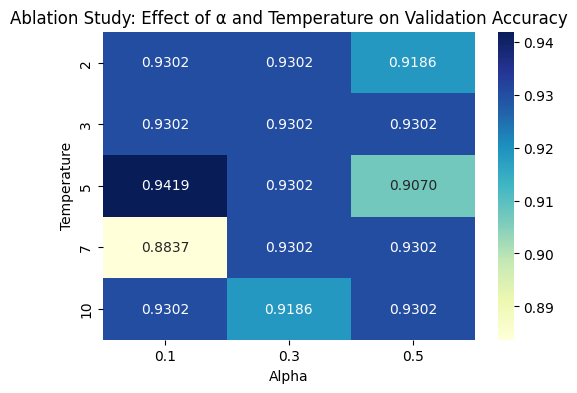

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
df = pd.DataFrame(results, columns=['alpha', 'temperature', 'val_accuracy'])
df_pivot = df.pivot(index= 'temperature', columns= 'alpha', values= 'val_accuracy')

plt.figure(figsize=(6,4))
sns.heatmap(df_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Ablation Study: Effect of α and Temperature on Validation Accuracy")
plt.xlabel("Alpha")
plt.ylabel("Temperature")
plt.show()

In [49]:
 # Initialize and compile distiller
distiller = Distiller(student=student, teacher=teacher)
distiller.compile(optimizer=keras.optimizers.Adam(),
metrics=['accuracy'],
student_loss_fn= keras.losses.BinaryCrossentropy() ,
distillation_loss_fn=keras.losses.KLDivergence(),
alpha=0.1,
temperature=10,
)

## Distill Teacher to Student

In [52]:
import os
import time
import psutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# =====================
# 1. TRAIN THE DISTILLER
# =====================

print("\n--- DISTILL TEACHER TO STUDENT ---\n")
start_time = time.time()
kd_history = distiller.fit(
    X_train, y_train,
    epochs=20,
    verbose=1,
    validation_data=(X_test, y_test)
)
end_time = time.time()

print(f"\nTraining time: {end_time - start_time:.2f} seconds")

# =====================
# 2. SAVE THE STUDENT MODEL ONLY
# =====================
student_model_path = "kd_model.h5"
student.save(student_model_path)
print(f"Student model saved at: {student_model_path}")

# =====================
# 3. EVALUATE THE STUDENT MODEL
# =====================
print("\n--- EVALUATING KD STUDENT MODEL ---\n")
kd_model = tf.keras.models.load_model(student_model_path)

# If labels are one-hot encoded
if y_test.ndim > 1:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

# Predict
start = time.time()
y_pred_probs = kd_model.predict(X_test, verbose=0)
end = time.time()

# Convert to labels
if y_pred_probs.shape[1] > 1:
    y_pred = np.argmax(y_pred_probs, axis=1)
else:
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Performance metrics
acc = accuracy_score(y_test_labels, y_pred)
prec = precision_score(y_test_labels, y_pred)
rec = recall_score(y_test_labels, y_pred)
f1 = f1_score(y_test_labels, y_pred)
auc = roc_auc_score(
    y_test_labels,
    y_pred_probs[:, 1] if y_pred_probs.shape[1] > 1 else y_pred_probs
)

# Efficiency metrics
inference_time = (end - start) * 1000  # ms
throughput = len(X_test) / (end - start)
memory_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)  # MB
file_size = os.path.getsize(student_model_path) / (1024 * 1024)  # MB
params = kd_model.count_params()

# =====================
# 4. DISPLAY RESULTS
# =====================
print("=== KD Student Model Metrics ===")
print(f"Accuracy:        {acc*100:.2f}%")
print(f"Precision:       {prec*100:.2f}%")
print(f"Recall:          {rec*100:.2f}%")
print(f"F1-score:        {f1*100:.2f}%")
print(f"AUC-ROC:         {auc:.4f}")
print(f"Model Size:      {file_size:.2f} MB")
print(f"Params:          {params:,}")
print(f"Inference Time:  {inference_time:.2f} ms")
print(f"Throughput:      {throughput:.2f} samples/sec")
print(f"RAM Usage:       {memory_usage:.2f} MB")



--- DISTILL TEACHER TO STUDENT ---

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9455 - distillation_loss: 1.5303e-04 - loss: 0.4963 - student_loss: 0.1542 - val_accuracy: 0.9651 - val_loss: 0.4985 - val_student_loss: 0.0702
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9558 - distillation_loss: 1.4808e-04 - loss: 0.4978 - student_loss: 0.1492 - val_accuracy: 0.9651 - val_loss: 0.4986 - val_student_loss: 0.0665
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9711 - distillation_loss: 1.3537e-04 - loss: 0.4995 - student_loss: 0.1424 - val_accuracy: 0.9651 - val_loss: 0.4986 - val_student_loss: 0.0627
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9673 - distillation_loss: 1.6785e-04 - loss: 0.5006 - student_loss: 0.1646 - val_accuracy: 0.9651 - val_loss: 0.4990 - val_student_loss: 0.0606
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9572 - distillation_loss: 1.3900e-04 - loss: 0.4969 - student_loss

In [ ]:
print( sep='\n')
print('DISTILL TEACHER TO STUDENT')
start_time = time.time()
kd_history=distiller.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test,y_test))
end_time = time.time()
print( sep='\n')

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 1️⃣ Get predictions from the student model
y_pred_prob = distiller.student.predict(X_test)

# 2️⃣ Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# 3️⃣ Convert one-hot encoded y_test to class labels
y_true_classes = np.argmax(y_test, axis=1)

# 4️⃣ Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 5️⃣ Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["B", "M"])
disp.plot(cmap='Blues')

# Save as high-resolution PNG
plt.savefig("WDBC_confusion_matrix.png", dpi=300, bbox_inches='tight')

 # Plots of accuracy and loss 

## Accuracy and loss of teacher model

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='lower right')
  plt.grid(visible=True)
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.grid(visible=True)
  plt.show()

In [ ]:
plotLearningCurve(teacher_history,epoch)

## Students functions

In [ ]:
def plotKDCurveD(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='lower right')
  plt.grid(visible=True)
  plt.show()

  plt.plot(epochRange,history.history['student_loss'])
  plt.plot(epochRange,history.history['val_student_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.grid(visible=True)
  plt.show()

## Plotting Student scratch Model( without KD)

In [ ]:
plotLearningCurve(student_scratch_history,epoch)

## Student knowledge distilled accuracy and loss

In [ ]:
plotKDCurveD(kd_history,epoch)

## Function plotting two models

In [ ]:
def plotKDCurveProf(his,tHis,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,tHis.history['accuracy'])
  plt.plot(epochRange,tHis.history['val_accuracy'])
  plt.plot(epochRange,his.history['accuracy'])
  plt.plot(epochRange,his.history['val_accuracy'])

  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['T_train','T_val','KD_train','KD_val'],loc='lower right')
  plt.grid(visible=True)
  plt.show()


  plt.plot(epochRange,tHis.history['loss'])
  plt.plot(epochRange,tHis.history['val_loss'])
  plt.plot(epochRange,his.history['student_loss'])
  plt.plot(epochRange,his.history['val_student_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['T_train','T_val','KD_train','KD_val'],loc='upper left')
  plt.grid(visible=True)
  plt.show()

## Student with KD Vs Teacher Accuracy and loss

In [ ]:
plotKDCurveProf(kd_history,teacher_history,epoch)

## Student with KD Vs Student without Kd Accuracy and loss

In [ ]:
plotKDCurveProf(kd_history,student_scratch_history,epoch)

# Result Summary

In [ ]:
print("Vals. \t\t TM \t SM_scratch \t SM")
print("="*50)
print("Acc. \t\t %.2f \t %.2f \t\t %.2f"%(teacher_history.history['accuracy'][epoch-1],student_scratch_history.history['accuracy'][epoch-1],kd_history.history['accuracy'][epoch-1]))
print("Val. Acc. \t %.2f \t %.2f \t\t %.2f"%(teacher_history.history['val_accuracy'][epoch-1],student_scratch_history.history['val_accuracy'][epoch-1],kd_history.history['val_accuracy'][epoch-1]))
print("Loss. \t\t %.2f \t %.2f \t\t %.2f"%(teacher_history.history['loss'][epoch-1],student_scratch_history.history['loss'][epoch-1],kd_history.history['loss'][epoch-1]))
print("Val. Loss. \t %.2f \t %.2f \t\t %.2f"%(teacher_history.history['val_loss'][epoch-1],student_scratch_history.history['val_loss'][epoch-1],kd_history.history['val_loss'][epoch-1]))